# Python ML library
## SCIKIT-LEARN
https://scikit-learn.org/stable/

Scikit-learn is a Python ML library that offers a wide range of algorithms and tools for tasks related to data mining and predictive analytics. 

The name "scikit-learn" is a combination of "sci" (short for science) and "kit" (short for toolkit), indicating that the library is a set of tools for data science.

- Simple and efficient interface
- It is built on top of other libraries (NumPy, SciPy and Matplotlib)
- It is possible to train ML models
- Perform cross validation
- Adjust hyperparameters
- Evaluate model performance and make predictions on new data.

## Machine Learning
● Set of techniques and algorithms used for drawing
of systems that learn from the data provided

● Basics of scientific computing, mathematics and statistics

![Imagem](https://raw.githubusercontent.com/E-man85/ML-PY/main/05-images/class4_image1.png)
![Imagem](https://raw.githubusercontent.com/E-man85/ML-PY/main/05-images/class4_image2.png)

## Machine Learning Workflow
![Imagem](https://raw.githubusercontent.com/E-man85/ML-PY/main/05-images/class4_image3.png)

**Scikit-learn algorithm cheat-sheet**

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

![Imagem](https://raw.githubusercontent.com/E-man85/ML-PY/main/05-images/class4_image4.png)

## Practice Scikit-Learn

In [1]:
#importar bibliotecas Machine Learning
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import seaborn as sns

In [2]:
# File url
url = 'https://github.com/E-man85/ML-PY/raw/main/03-data/winequality.xls'
# Read directly from GitHub with pandas
df1 = pd.read_excel(url, sheet_name=0, engine='xlrd')
# Show first 5 rows of dataframe
df1.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,X,Y,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-5133.037065,274269.661220,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,-19891.404070,200352.226164,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,-20344.634864,223184.242998,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,-39206.746544,233633.249037,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-30277.806444,223382.332307,5


In [3]:
#select by criteria and create new dataframe (1)
redtot = df1.loc[df1['type'].isin(['red'])]
redtot.head(5)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,X,Y,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-5133.037065,274269.661220,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,-19891.404070,200352.226164,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,-20344.634864,223184.242998,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,-39206.746544,233633.249037,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-30277.806444,223382.332307,5


In [4]:
whitot = df1.loc[df1['type'].isin(['white'])]
whitot.head(5)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,X,Y,quality
1599,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,20431.684436,206608.071242,6
1600,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,-38245.848984,238954.521661,6
1601,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,-22958.900223,218458.297087,6
1602,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,-27705.072509,263860.018901,6
1603,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,-31405.018347,261329.136280,6


In [5]:
#isolate control region and convert target to binary
control = df1.loc[df1['alcohol'] >= 10].copy()
control['vintage'] = (control['quality'] >= 7).astype(int)
control.head(5)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,X,Y,quality,vintage
7,red,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,-12766.093599,199255.687337,7,1
9,red,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,-28100.555582,262625.236323,5,0
11,red,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,-27054.948290,267809.714774,5,0
16,red,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,-33810.913912,228737.691671,7,1
30,red,6.7,0.675,0.07,2.4,0.089,17.0,82.0,0.9958,3.35,0.54,10.1,-26168.172199,263423.870685,5,0


In [6]:
control['vintage'].sum()

1120

In [7]:
#select by criteria and create new dataframe (2)
redcont = control.loc[df1['type'].isin(['red'])]
redcont.head(5)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,X,Y,quality,vintage
7,red,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,-12766.093599,199255.687337,7,1
9,red,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,-28100.555582,262625.236323,5,0
11,red,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,-27054.948290,267809.714774,5,0
16,red,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,-33810.913912,228737.691671,7,1
30,red,6.7,0.675,0.07,2.4,0.089,17.0,82.0,0.9958,3.35,0.54,10.1,-26168.172199,263423.870685,5,0


In [8]:
whicont = control.loc[df1['type'].isin(['white'])]
whicont.head(5)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,X,Y,quality,vintage
1601,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,-22958.900223,218458.297087,6,0
1604,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,-30956.377206,220308.933264,6,0
1608,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,-30092.353803,262481.436144,6,0
1609,white,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,-29913.825341,193113.488836,5,0
1611,white,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,-30067.665106,267551.621580,5,0


In [9]:
#select only some columns of the control dataframe and create a new dataframe
selparam = ['vintage','density','pH','alcohol']
ctl = whicont[selparam].copy()
ctl['vintage'].sum()

915

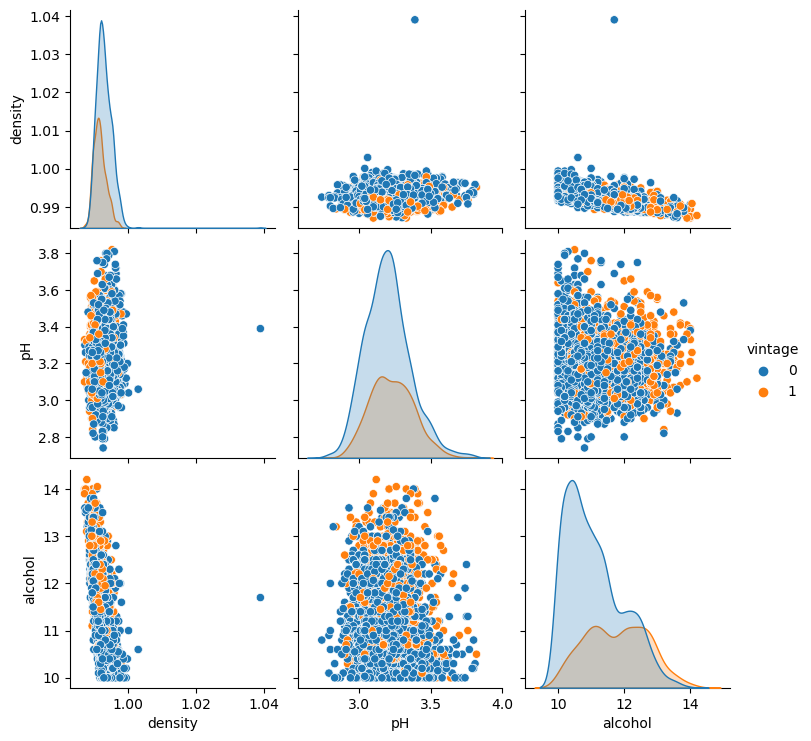

In [10]:
#scatter plot of the various training parameters as a function of the classification (seaborn)
sns.pairplot(ctl, hue='vintage')

In [11]:
#remove all nan values ​​for input from models
ctl.dropna(inplace=True)

In [12]:
# extract target from dataframe to array
target = ctl.pop('vintage').values
target

array([0, 0, 0, ..., 0, 1, 0])

In [13]:
#create training and testing dataset for classification targets
X_train, X_test, y_train, y_test = train_test_split(ctl, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=0)

array([[<AxesSubplot: xlabel='density', ylabel='density'>,
        <AxesSubplot: xlabel='pH', ylabel='density'>,
        <AxesSubplot: xlabel='alcohol', ylabel='density'>],
       [<AxesSubplot: xlabel='density', ylabel='pH'>,
        <AxesSubplot: xlabel='pH', ylabel='pH'>,
        <AxesSubplot: xlabel='alcohol', ylabel='pH'>],
       [<AxesSubplot: xlabel='density', ylabel='alcohol'>,
        <AxesSubplot: xlabel='pH', ylabel='alcohol'>,
        <AxesSubplot: xlabel='alcohol', ylabel='alcohol'>]], dtype=object)

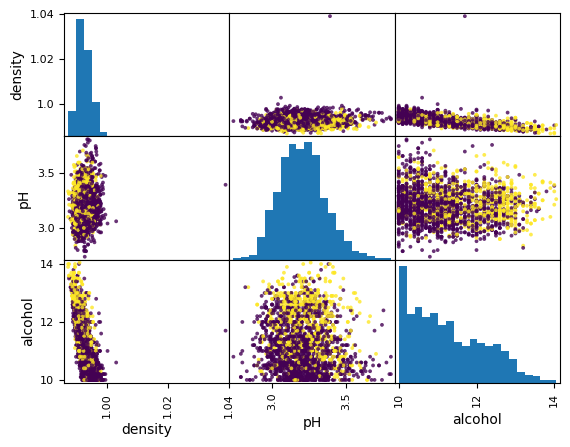

In [14]:
#scatter plot between training parameters (matplotlib)
scatter_matrix(X_train, c=y_train, marker='.', hist_kwds={'bins': 20}, s=30, alpha=.8)

## TRAIN CLASSIFICATION MODELS
### k-Nearest Neighbors
Simple and intuitive algorithm used for both classification and regression. The operation of KNN is based on the idea that similar samples are close in the feature space.


In [15]:
# k-Nearest Neighbors (1)
KNN1 = KNeighborsClassifier(n_neighbors=1, n_jobs=2).fit(X_train, y_train) # n_jobs is relative to our cpu cores
round(KNN1.score(X_test, y_test), 4)

0.7445

In [16]:
# k-Nearest Neighbors (2)
KNN2 = KNeighborsClassifier(n_neighbors=2, n_jobs=2).fit(X_train, y_train)
round(KNN2.score(X_test, y_test), 4)

0.7176

### Random Forest
Ensemble learning algorithm based on decision trees. It creates multiple decision trees during training and combines the output of each tree to give a final answer.

In [17]:
RFC = RandomForestClassifier(n_estimators=100, n_jobs=2).fit(X_train, y_train)
round(RFC.score(X_test, y_test), 4)

0.7815

### Logistic Regression
Statistical model which, despite the name "regression", is mainly used for classification tasks. The basic idea is to predict the probability that an example belongs to a specific category.

In [18]:
LRN = LogisticRegression(solver='newton-cg', multi_class='ovr').fit(X_train, y_train)
round(LRN.score(X_test,y_test), 4)

0.7059

### Support Vector Machine
The goal of SVM is to find a hyperplane that best separates classes in feature space.

In [19]:
SVM = svm.SVC(decision_function_shape='ovr', kernel='rbf').fit(X_train, y_train)
round(SVM.score(X_test, y_test), 4)

0.6773

### KNN1

In [20]:
# EVALUATE CLASSIFICATION PRODUCED
predicted = KNN1.predict(ctl) 
print(confusion_matrix(target, predicted))
print(accuracy_score(target, predicted))
print(classification_report(target, predicted, target_names=['class 0', 'class 1']))

[[1979   81]
 [  74  841]]
0.9478991596638655
              precision    recall  f1-score   support

     class 0       0.96      0.96      0.96      2060
     class 1       0.91      0.92      0.92       915

    accuracy                           0.95      2975
   macro avg       0.94      0.94      0.94      2975
weighted avg       0.95      0.95      0.95      2975



### KNN2

In [21]:
# EVALUATE CLASSIFICATION PRODUCED
predicted = KNN2.predict(ctl) 
print(confusion_matrix(target, predicted))
print(accuracy_score(target, predicted))
print(classification_report(target, predicted, target_names=['class 0', 'class 1']))

[[2019   41]
 [ 432  483]]
0.8410084033613445
              precision    recall  f1-score   support

     class 0       0.82      0.98      0.90      2060
     class 1       0.92      0.53      0.67       915

    accuracy                           0.84      2975
   macro avg       0.87      0.75      0.78      2975
weighted avg       0.85      0.84      0.83      2975



### RFC

In [22]:
# EVALUATE CLASSIFICATION PRODUCED
predicted = RFC.predict(ctl) 
print(confusion_matrix(target, predicted))
print(accuracy_score(target, predicted))
print(classification_report(target, predicted, target_names=['class 0', 'class 1']))

[[2010   50]
 [  83  832]]
0.9552941176470588
              precision    recall  f1-score   support

     class 0       0.96      0.98      0.97      2060
     class 1       0.94      0.91      0.93       915

    accuracy                           0.96      2975
   macro avg       0.95      0.94      0.95      2975
weighted avg       0.96      0.96      0.96      2975



### LRN

In [23]:
# EVALUATE CLASSIFICATION PRODUCED
predicted = LRN.predict(ctl) 
print(confusion_matrix(target, predicted))
print(accuracy_score(target, predicted))
print(classification_report(target, predicted, target_names=['class 0', 'class 1']))

[[1863  197]
 [ 633  282]]
0.7210084033613445
              precision    recall  f1-score   support

     class 0       0.75      0.90      0.82      2060
     class 1       0.59      0.31      0.40       915

    accuracy                           0.72      2975
   macro avg       0.67      0.61      0.61      2975
weighted avg       0.70      0.72      0.69      2975



## SVM

In [24]:
# EVALUATE CLASSIFICATION PRODUCED
predicted = SVM.predict(ctl) 
print(confusion_matrix(target, predicted))
print(accuracy_score(target, predicted))
print(classification_report(target, predicted, target_names=['class 0', 'class 1']))

[[2040   20]
 [ 866   49]]
0.7021848739495798
              precision    recall  f1-score   support

     class 0       0.70      0.99      0.82      2060
     class 1       0.71      0.05      0.10       915

    accuracy                           0.70      2975
   macro avg       0.71      0.52      0.46      2975
weighted avg       0.70      0.70      0.60      2975



In [25]:
# PRODUCE NEW ESTIMATES FOR EACH CLASSIFIER
df1sel = whitot[['density', 'pH', 'alcohol']].copy()
df1sel.dropna(inplace=True)
dfpred = df1sel.copy()
dfpred['KNN1'] = KNN1.predict(df1sel)
dfpred['KNN2'] = KNN2.predict(df1sel)
dfpred['RFC']  = RFC.predict(df1sel)
dfpred['LRN']  = LRN.predict(df1sel)
dfpred['SVM']  = SVM.predict(df1sel)
dfpred

,density,pH,alcohol,KNN1,KNN2,RFC,LRN,SVM
1599,1.00100,3.00,8.8,0,0,0,0,0
1600,0.99400,3.30,9.5,0,0,0,0,0
1601,0.99510,3.26,10.1,0,0,0,0,0
1602,0.99560,3.19,9.9,0,0,0,0,0
1603,0.99560,3.19,9.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
6492,0.99114,3.27,11.2,0,0,0,0,0
6493,0.99490,3.15,9.6,0,0,0,0,0
6494,0.99254,2.99,9.4,0,0,0,0,0
6495,0.98869,3.34,12.8,1,1,1,1,0


In [26]:
#create output file for external analysis
dfpred['vintage'] = (whitot['quality'] >= 7).astype(int)
dfpred[['quality']] = whitot[['quality']]
dfpred

,density,pH,alcohol,KNN1,KNN2,RFC,LRN,SVM,vintage,quality
1599,1.00100,3.00,8.8,0,0,0,0,0,0,6
1600,0.99400,3.30,9.5,0,0,0,0,0,0,6
1601,0.99510,3.26,10.1,0,0,0,0,0,0,6
1602,0.99560,3.19,9.9,0,0,0,0,0,0,6
1603,0.99560,3.19,9.9,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...
6492,0.99114,3.27,11.2,0,0,0,0,0,0,6
6493,0.99490,3.15,9.6,0,0,0,0,0,0,5
6494,0.99254,2.99,9.4,0,0,0,0,0,0,6
6495,0.98869,3.34,12.8,1,1,1,1,0,1,7


In [27]:
# export dataframe to text file
dfpred.to_csv('exportclass.txt') 

## Load the data again 

In [28]:
# File url
url = 'https://github.com/E-man85/ML-PY/raw/main/03-data/winequality.xls'
# Read directly from GitHub with pandas
df = pd.read_excel(url, sheet_name=0, engine='xlrd')
# Show first 5 rows of dataframe
df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,X,Y,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-5133.037065,274269.661220,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,-19891.404070,200352.226164,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,-20344.634864,223184.242998,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,-39206.746544,233633.249037,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-30277.806444,223382.332307,5


### Generate report - pandasprofiling

In [29]:
import pandas_profiling 
profile = pandas_profiling.ProfileReport(df, title='Data Report')
profile.to_file("04DataReport.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
#select by criteria and convert target to binary
red   = df.loc[df['type'].isin(['red'])].copy()
white = df.loc[df['type'].isin(['white'])].copy()
white['vintage'] = (white['quality'] >= 7).astype(int)
white['vintage'].sum()

1060

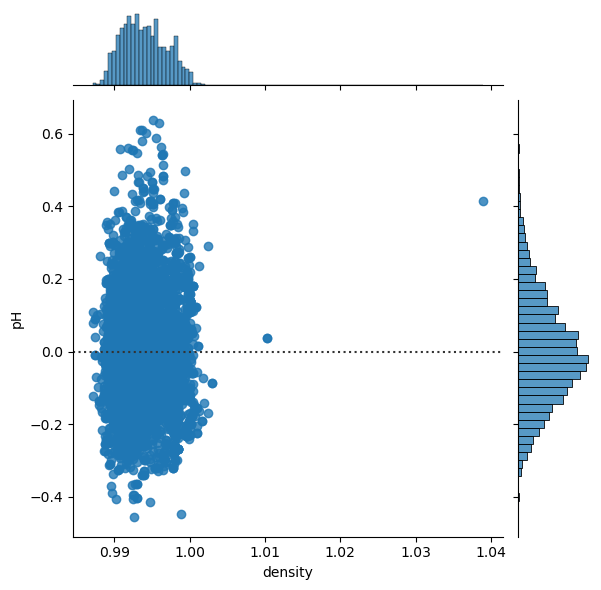

In [31]:
# seaborn views
import seaborn as sns
# seaborn jointplot { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }
sns.jointplot(x='density', y='pH', data=white, kind='resid')

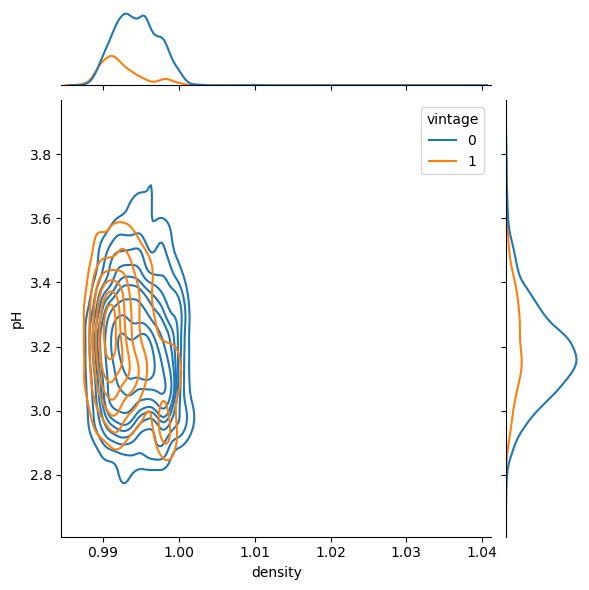

In [32]:
# diferente kind
sns.jointplot(x='density', y='pH', data=white, hue='vintage', kind="kde")

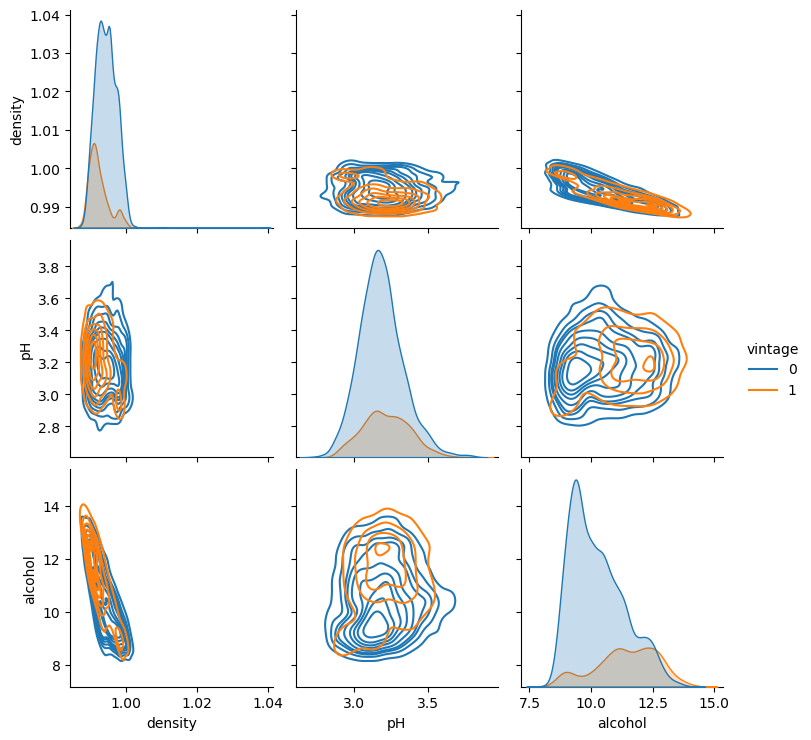

In [33]:
# seaborn pairplot
vars = ['density', 'pH', 'alcohol']
sns.pairplot(white, vars=vars, hue='vintage', kind='kde')

In [34]:
# Correlation table
white.corr(numeric_only = True)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,X,Y,quality,vintage
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,0.005018,0.011786,-0.113663,-0.080748
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,0.009633,-0.021680,-0.194723,-0.067225
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,0.006114,0.017823,-0.009209,-0.035330
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,0.012408,0.003195,-0.097577,-0.117085
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,0.007100,-0.002198,-0.209934,-0.183118
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.001280,-0.006776,0.008158,-0.023413
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.003223,0.004409,-0.174737,-0.162202
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,0.014719,0.004172,-0.307123,-0.283871
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.014604,0.003504,0.099427,0.093510
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,-0.007645,-0.003421,0.053678,0.047410


<AxesSubplot: >

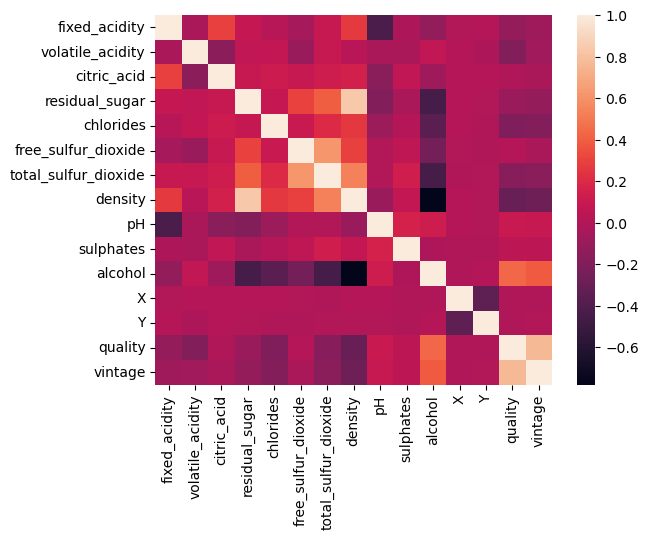

In [35]:
# seaborn heatmap (correlation)
sns.heatmap(white.corr(numeric_only = True))

<AxesSubplot: >

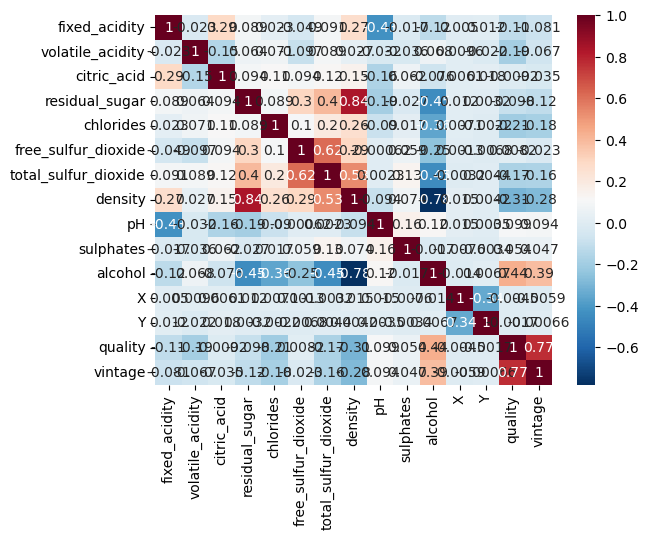

In [36]:
# seaborn heatmap (correlation)
sns.heatmap(white.corr(numeric_only = True), annot=True, cmap='RdBu_r') # cmap='RdBu_r'Rd-red, Bu-blue,  _r inverts the correlation colors
# this analysis is important because highly correlated variables should not be considered together
# because they explain the same thing..

## Feature Selection

Feature selection, also known as variable selection, is an important process in ML for choosing the most relevant or informative variables for the model.

Some methodologies for feature selection:
- **Univariable Selection**: Each feature is evaluated individually against the target variable using statistical methods such as statistical tests (eg t-test) or measures of association (eg correlation). The most significant or relevant features are selected based on the results of these analyses.
- **Recursive Feature Elimination (RFE)**: RFE is a recursive approach where a model is initially trained on all features and then less important features are iteratively eliminated based on some criteria (e.g., regression coefficients). This process is repeated until a desired number of features is reached.
- **Selection based on L1 Regularization**: L1 Regularization, also known as LASSO (Least Absolute Shrinkage and Selection Operator) regularization, can be used to select features. L1 Regularization adds a penalty term to the model's cost function, which incentivizes the coefficients of less important features to become zero. By fitting the model with L1 Regularization and selecting features with non-zero coefficients, it is possible to perform automatic feature selection.
- **Selection based on mutual information**: Mutual information is a statistical measure that measures the mutual dependence between two variables. Mutual information-based feature selection evaluates the relationship between each feature and the target variable using this measure. The features with the most mutual information are selected as the most relevant for the model.
- **Selection based on filtering algorithms**: Filtering algorithms are methods that apply statistical or heuristic measures to evaluate the relevance of features independently of the predictive model. Examples of these algorithms include the Chi-square test, information gain, correlation coefficient, among others. Features are ranked based on these measures and a predefined number of features with the highest score are selected.
- **Selection based embedding algorithms**: Embedding algorithms, such as the Lasso algorithm or the Elastic Net algorithm, incorporate feature selection directly into the model training process. These algorithms adjust feature coefficients during training, allowing automatic selection of the most relevant features.

### Methodologies for feature selection

In [37]:
# Define data
X = white.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]] 
y = white['quality'] 

### Variance Threshold

In [38]:
# The X.var() function returns the variance of each column of DataFrame X.
# Variance is a measure of dispersion that indicates how far the values ​​are from the mean.
# In the context of feature selection, calculating the variance of columns can be useful to identify which features have agreater or lesser variability in the data.
X.var()
# select features that meet the criteria
from sklearn.feature_selection import VarianceThreshold
SEL = VarianceThreshold(threshold=(1))
# The scikit-learn VarianceThreshold class is used to perform feature selection based on variance.
# It removes features that have a variance below a certain threshold.
SEL.fit_transform(X) 
#SEL.fit_transform(X) fits the SEL selector to X data
#returns an array of features where the variance limit is greater than 1

array([[ 20.7,  45. , 170. ,   8.8],
       [  1.6,  14. , 132. ,   9.5],
       [  6.9,  30. ,  97. ,  10.1],
       ...,
       [  1.2,  30. , 111. ,   9.4],
       [  1.1,  20. , 110. ,  12.8],
       [  0.8,  22. ,  98. ,  11.8]])

### Recursive Feature Elimination (RFE)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
# The RFE (Recursive Feature Elimination) class of scikit-learn is used to perform recursive feature selection.
# It uses an estimator (in your case, LinearRegression) to evaluate the importance of features and iteratively eliminates
# least important ones until the desired number of features is reached.
# n_features_to_select is set to 3, which means you want to select the 3 most important features.
# The step parameter is set to 1, which indicates that a feature will be dropped on each iteration.
LR = LinearRegression()
RFE = RFE(estimator=LR, n_features_to_select=3, step=1)
RFE.fit(X, y)
# Finally, RFE.ranking_ returns feature rankings after selection.
# Rankings are integer values, where 1 indicates the most important feature, and so on
RFE.ranking_

array([6, 1, 7, 5, 1, 8, 9, 1, 4, 3, 2])

### Select From Model

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
# The "Select From Model" approach is used to select the most important features based on the assigned importance
# to each feature by a given model.
# In the example, we are using a regressive decision tree as a model to perform this selection.
DTR = DecisionTreeRegressor().fit(X, y)
# DTR is the instance of the regressive decision tree that will be used as a model to assign importance to features.
MODEL = SelectFromModel(DTR, prefit=True, threshold='median')
# The line MODEL = SelectFromModel(DTR, prefit=True, threshold='median') creates an instance of SelectFromModel,
# where model used is set to DTR (regressive decision tree), prefit is set to True
# (indicating that the DTR model has already been fitted to the data) and threshold is set to 'median'
# (indicating that features will be selected based on importance above the median).
X_transformed = MODEL.transform(X)
# MODEL.transform(X) transforms the feature matrix X to contain only the selected features based on
# in the importance attributed by the model. The transformed matrix is ​​stored in the X_transformed variable.
X_transformed

c:\Users\Egomes\anaconda3\envs\mlearn\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


array([[  0.27,  20.7 ,  45.  , 170.  ,   3.  ,   8.8 ],
       [  0.3 ,   1.6 ,  14.  , 132.  ,   3.3 ,   9.5 ],
       [  0.28,   6.9 ,  30.  ,  97.  ,   3.26,  10.1 ],
       ...,
       [  0.24,   1.2 ,  30.  , 111.  ,   2.99,   9.4 ],
       [  0.29,   1.1 ,  20.  , 110.  ,   3.34,  12.8 ],
       [  0.21,   0.8 ,  22.  ,  98.  ,   3.26,  11.8 ]])

### Create training and testing dataset

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### TRAIN REGRESSION MODELS .fit, .score, .predict. (same API as classification)

In [42]:
# Linear Regression
from sklearn.linear_model import LinearRegression # linear regression, fitting the line Y = mX + b
LR = LinearRegression().fit(X_train, y_train)
print(round(LR.score(X_test, y_test), 4))
print(LR.coef_ )# the higher the coefficients, the more impact on the model
print(LR.intercept_)

0.2513
[ 1.06981517e-01 -1.81032516e+00 -1.51630286e-02  9.29140769e-02
 -5.56723628e-01  4.43552129e-03 -2.86630409e-04 -1.88992556e+02
  8.22368627e-01  6.38975597e-01  1.37843182e-01]
188.45929532076147


In [43]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor 
DTR = DecisionTreeRegressor(random_state=0).fit(X_train, y_train) # random_state trial/error
print(round(DTR.score(X_test, y_test), 4))

0.0877


In [44]:
# Evaluate the importance of features (more explanatory)
for col, val in sorted(zip(X_train.columns, DTR.feature_importances_),
                       key=lambda x: x[1], reverse=True)[:11]:
    print(f"{col:10}{val:10.3f}")

alcohol        0.246
volatile_acidity     0.132
free_sulfur_dioxide     0.105
pH             0.075
sulphates      0.072
residual_sugar     0.069
chlorides      0.065
total_sulfur_dioxide     0.064
fixed_acidity     0.063
density        0.059
citric_acid     0.050


In [45]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor 
RFR = RandomForestRegressor(random_state=4).fit(X_train, y_train) 
round(RFR.score(X_test, y_test), 4)

0.4538

In [46]:
# Evaluate the importance of features (more explanatory)
for col, val in sorted(zip(X_train.columns, RFR.feature_importances_),
                       key=lambda x: x[1], reverse=True)[:11]:
    print(f"{col:10}{val:10.3f}")

alcohol        0.251
volatile_acidity     0.128
free_sulfur_dioxide     0.109
pH             0.074
residual_sugar     0.071
chlorides      0.066
total_sulfur_dioxide     0.066
sulphates      0.062
density        0.059
fixed_acidity     0.058
citric_acid     0.057


In [47]:
# METRICS FOR MODEL EVALUATION
from sklearn import metrics
# metrics
metrics = {
    'R2'   : metrics.r2_score,
    'MAE'  : metrics.mean_absolute_error,
    'RMSE' : metrics.mean_squared_error}

models = {
    'LR' : LR,
    'DTR': DTR,
    'RFR': RFR}

for i in metrics:
    print(f'\n{i}\n-----')
    for j in models:
        met = metrics[i]
        mod = models[j]
        
        y_test_pred = mod.predict(X_test)
        test_score  = met(y_test, y_test_pred)
        print(f'{j} {i}: {test_score:.4f}')


R2
-----
LR R2: 0.2513
DTR R2: 0.0877
RFR R2: 0.4538

MAE
-----
LR MAE: 0.6297
DTR MAE: 0.5327
RFR MAE: 0.4948

RMSE
-----
LR RMSE: 0.6598
DTR RMSE: 0.8041
RFR RMSE: 0.4814


In [48]:
# PRODUCE NEW ESTIMATES FOR EACH MODEL
Xsel = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]].copy() # select by index
Xsel.dropna(inplace=True) # clear NaN if any
Xpred = Xsel.copy()
Xpred['LR']  = LR.predict(Xsel)
Xpred['DTR'] = DTR.predict(Xsel)
Xpred['RFR'] = RFR.predict(Xsel)
Xpred[['quality', 'X', 'Y']] = df[['quality', 'X', 'Y']]
Xpred
# export to csv
#Xpred.to_csv('mlearnexport.csv') 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,LR,DTR,RFR,quality,X,Y
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4.120296,4.0,4.52,5,-5133.037065,274269.661220
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,4.008533,4.0,4.61,5,-19891.404070,200352.226164
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,4.152377,5.0,4.59,5,-20344.634864,223184.242998
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,5.040677,4.0,4.88,6,-39206.746544,233633.249037
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4.120296,4.0,4.52,5,-30277.806444,223382.332307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.179443,6.0,6.34,6,-11906.686119,220458.424715
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.681418,5.0,5.14,5,-40305.138001,222811.809785
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,5.373102,6.0,5.86,6,-20915.489754,216220.323941
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,6.564153,7.0,6.98,7,-28367.071006,194490.884343
